# ***Tablas de frecuencias para datos agrupados y representación gráfica.***

## **Fundamentos de estadística para analítica de Datos. Módulo de Maestría**
### ***Docente: Luis Andres Campos Maldonado.***

Si tenemos una cantidad grande de datos, como por ejemplo:

- De una variable continua.
- Una variable discreta con una gran cantidad de valores distribuidos en un intervalo de longitud considerable.

Podemos agrupar por intervalos y hacer una resumen de los datos para facilitar su lectura. Para este propósito veremos en está sección las tablas de frecuencia para datos agrupados.

**Definición [Tabla de Frecuencias]** :  Es un resumen en forma de tabla que muestra el número de elementos $(frecuencia)$ en cada una de las diferentes clases o intervalos.

- Las clases o intervalos deben ser disyuntos.

- En la tabla se muestran las cantidades y los porcentajes de cada una de las medidas.

- Permite conocer la manera en que están distribuidos los datos.

**Observación**   

- Si se toman muy pocos intervalos se pierde información de los datos.
- Si se toman muchas clases o intervalos se pierde el objetivo de resumir.

| Intervalo o clase $\large{I_i}$  | Frecuencia Absoluta $\large{(n_i)}$|Frecuencia Abs. Acumulada $\large{(N_i)}$ | Frecuencia  Relativa $\large{(f_i=\frac{n_i}{N})}$ | Frecuencia Rel. Acumulada $\large{(F_i)}$| 
|:-------------------:|:---:|:---:|:---:|:---:|
| $I_1=[a_1,a_2)$ | $n_1$ : número de elementos en $I_1$ | $N_1=n_1$ | $\large{f_1=\dfrac{n_1}{N}}$ | $\large{F_1=f_1}$  
| $I_2=[a_2,a_3)$ | $n_2$ : número de elementos en $I_2$ | $N_2=n_1+n_2$ | $\large{f_2=\dfrac{n_2}{N}}$ | $\large{F_2=f_1+f_2}$  
$\dots$ | $\dots$ | $\dots$ |  $\dots$ | $\dots$ 
 $I_k=[a_{k-1},a_{k})$ | $n_k$ : número de elementos en $I_k$ | $N_k=n_1+n_2+ \dots + n_k$ | $\large{f_k=\dfrac{n_k}{N}}$ | $\large{F_k}$	
Total | $N$	| $N_k=n$ | $\large{1}$ | $\large{1}$

Para construir la tabla de frecuencias anterior debemos tener en cuenta los siguientes elementos:

- Determinar el número de clases o intervalos. 
- Determinar la amplitud de cada intervalo. Por lo generar se toma la misma amplitud para todos los intervalos.
- Se determinan los intervalos $I_k$. Se debe tener en cuenta que los $I_k$ deben ser disyuntos.



In [1]:
## Conentando con google drive.
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/Ucentral Maestría/Fundamentos_2022-II/Lecturas_curso"

/content/drive/MyDrive/Ucentral Maestría/Fundamentos_2022-II/Lecturas_curso


In [3]:
## Importamos el dataframe
import pandas as pd

df = pd.read_json("datas/espectro.json")
df.head()

,nombre_sonda,ciudad_departamento,fecha_medicion,nivel_exposicion_campos,limite_restrictivo,porcentaje_exposicion,geocoded_column
0,Bogota_BOSA_2,Bogota_BOGOTA,2020-06-30T23:54:00.000,1.11,28,3.96,"{'type': 'Point', 'coordinates': [-74.1688982,..."
1,Santa_Marta_TERMINAL,Santa_Marta_MAGDALENA,2020-06-30T23:54:00.000,2.14,28,7.64,"{'type': 'Point', 'coordinates': [-74.18208333..."
2,Zipaquira_ZIPA_CONSTRUCTORA,Zipaquira_CUNDINAMARCA,2020-06-30T23:54:00.000,1.53,28,5.46,"{'type': 'Point', 'coordinates': [-74.00063, 5..."
3,Armenia_CENTRO,Armenia_QUINDIO,2020-06-30T23:54:00.000,1.51,28,5.39,"{'type': 'Point', 'coordinates': [-75.67364, 4..."
4,Pereira_CENTENARIO,Pereira_RISARALDA,2020-06-30T23:54:00.000,0.00,28,0.00,"{'type': 'Point', 'coordinates': [-75.698193, ..."


In [4]:
# Inspección rápida. Nombre de columnas.
df.columns

Index(['nombre_sonda', 'ciudad_departamento', 'fecha_medicion',
       'nivel_exposicion_campos', 'limite_restrictivo',
       'porcentaje_exposicion', 'geocoded_column'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nombre_sonda             1000 non-null   object 
 1   ciudad_departamento      1000 non-null   object 
 2   fecha_medicion           1000 non-null   object 
 3   nivel_exposicion_campos  1000 non-null   float64
 4   limite_restrictivo       1000 non-null   int64  
 5   porcentaje_exposicion    1000 non-null   float64
 6   geocoded_column          1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
## Vamos a trabajar con la feature "nivel_exposicion_campos"
df["nivel_exposicion_campos"]

0      1.11
1      2.14
2      1.53
3      1.51
4      0.00
       ... 
995    1.93
996    2.06
997    2.11
998    1.80
999    0.49
Name: nivel_exposicion_campos, Length: 1000, dtype: float64

In [7]:
## Alguna información de la feature.
print("Mínimo valor:",df['nivel_exposicion_campos'].min())
print("Máximo valor:",df['nivel_exposicion_campos'].max())

Mínimo valor: 0.0
Máximo valor: 7.33


In [8]:
## Podemos tener un mejor resumen.
df['nivel_exposicion_campos'].describe()

count    1000.00000
mean        1.50879
std         1.51972
min         0.00000
25%         0.53000
50%         1.00000
75%         1.81750
max         7.33000
Name: nivel_exposicion_campos, dtype: float64

En este caso tenemos $1.000$ datos concentrados en el intervalo $[0,7.33]$. Como lo vamos a hacer manualmente, usaremos una partición con $10$ intervalos. Para hacer esta partición trabajaremos con [`pd.cut()`.](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)



In [9]:
pd.cut(df["nivel_exposicion_campos"], bins = 10, right = False)

0      [0.733, 1.466)
1      [1.466, 2.199)
2      [1.466, 2.199)
3      [1.466, 2.199)
4        [0.0, 0.733)
            ...      
995    [1.466, 2.199)
996    [1.466, 2.199)
997    [1.466, 2.199)
998    [1.466, 2.199)
999      [0.0, 0.733)
Name: nivel_exposicion_campos, Length: 1000, dtype: category
Categories (10, interval[float64, left]): [[0.0, 0.733) < [0.733, 1.466) < [1.466, 2.199) <
                                           [2.199, 2.932) ... [4.398, 5.131) < [5.131, 5.864) <
                                           [5.864, 6.597) < [6.597, 7.337)]

In [10]:
TFA = pd.cut(df['nivel_exposicion_campos'], bins = 10, right = False).value_counts().to_frame(name="Freq")
TFA.reset_index(inplace =True)
TFA = TFA.rename(columns = {"index":"Intervalos"})
TFA

,Intervalos,Freq
0,"[0.0, 0.733)",404
1,"[0.733, 1.466)",226
2,"[1.466, 2.199)",187
3,"[3.665, 4.398)",44
4,"[2.199, 2.932)",35
5,"[4.398, 5.131)",27
6,"[2.932, 3.665)",26
7,"[5.864, 6.597)",24
8,"[5.131, 5.864)",23
9,"[6.597, 7.337)",4


In [11]:
## Frecuencia acumulada, relativa y relativa acumulada.
TFA["Freq_Acum"] = TFA['Freq'].cumsum()
TFA["Freq_Rela"] = TFA["Freq"]/sum(TFA["Freq"])
TFA["Freq_Rel_Acum"] = TFA["Freq_Rela"].cumsum()
TFA

,Intervalos,Freq,Freq_Acum,Freq_Rela,Freq_Rel_Acum
0,"[0.0, 0.733)",404,404,0.404,0.404
1,"[0.733, 1.466)",226,630,0.226,0.630
2,"[1.466, 2.199)",187,817,0.187,0.817
3,"[3.665, 4.398)",44,861,0.044,0.861
4,"[2.199, 2.932)",35,896,0.035,0.896
5,"[4.398, 5.131)",27,923,0.027,0.923
6,"[2.932, 3.665)",26,949,0.026,0.949
7,"[5.864, 6.597)",24,973,0.024,0.973
8,"[5.131, 5.864)",23,996,0.023,0.996
9,"[6.597, 7.337)",4,1000,0.004,1.000


Lo anterior, es una forma paso a paso de cómo generar una tabla de frecuencias.



## ***Representación gráfica: Histogramas y Ojivas***

En esta sección trabajaremos dos formas de representración de datos agrupados:

- Histogramas.
- Ojivas.

### ***Histograma.***

Es una gráfica con barras verticales en las que se muestra en el eje $x$ la división en los intervalos o clases de la variable y la altura de cada barra representa el número de elementos presentes en cada intervalo. Con el módulo pandas, podemos usar el método [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)



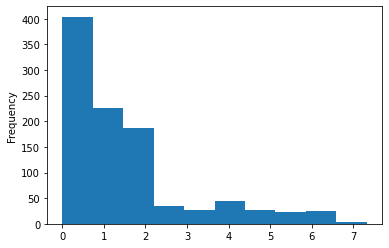

In [12]:
## Histograma de la feature "nivel_exposicion_campos"
df["nivel_exposicion_campos"].plot(kind = "hist")

Por supuesto podemos generar un mejor plot.

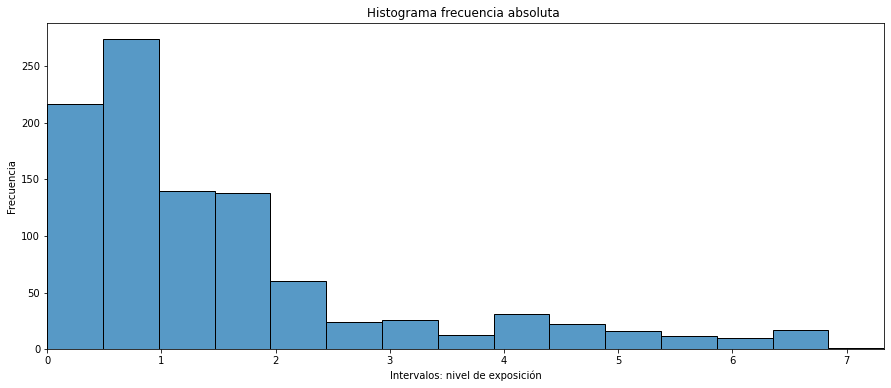

In [13]:
import matplotlib.pyplot as plt                 ## Módulo para graficar
import seaborn as sns                           ## Módulo para graficar

plt.figure(figsize = (15,6))                    ## Creamos una figura de cierto tamaño
sns.histplot(data = df,                         ## pandas-DataFrame
             x = "nivel_exposicion_campos",     ## Feature a plotear.
             bins = 15,                         ## Número de bins
             )
plt.xlabel("Intervalos: nivel de exposición",)  ## Título eje x.
plt.ylabel("Frecuencia")                        ## Título eje y.
plt.title("Histograma frecuencia absoluta ",)   ## Título del plot.
plt.xlim([0,7.33])                              ## Limites eje x
plt.show()                                      ## Mostar el plot.

## ***Otro módulo gráfico: [plotly](https://plotly.com/python/).***



In [14]:
import plotly.express as px

fig = px.histogram(data_frame = df, x = "nivel_exposicion_campos",  ## dataframe y feature a plotear.
                   nbins = 15,                                      ## Número de bins
                   color_discrete_sequence = ["red"],               ## Color histograma.
                   labels={'nivel_exposicion_campos':'Intervalo',}, ## Nombre flotante
                   title = "Histograma frecuencia absoluta", )      ## Título plot.
fig.update_layout(bargap = 0.02,                                    ## Separación barras.
                  yaxis_title="Conteo"                              ## Etiqueta eje y.
                  )
fig.update_traces(xbins = 
                  {"start": df['nivel_exposicion_campos'].min(),    ## Lim izq histograma
                   "end": df['nivel_exposicion_campos'].max(),}     ## Lim der histograma 
                  ) 
## Cambia la palabra "count" por conteo en todo el plot.
fig.for_each_trace(lambda t:t.update(hovertemplate=t.hovertemplate.\
                                     replace("count","Conteo")))                      
fig.show()

Si además queremos agregar la línea de densidad, 



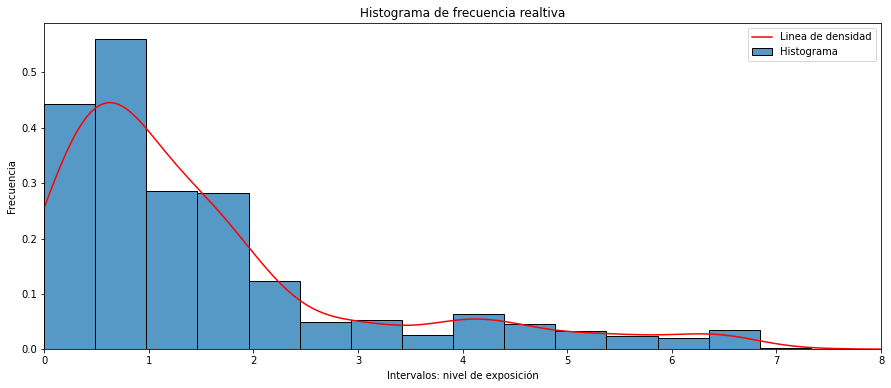

In [15]:
plt.figure(figsize = (15,6))
sns.histplot(data = df ,
             x = "nivel_exposicion_campos",
             bins = 15,
             stat='density',                    ## Tipo de información.                       
             label = "Histograma")              ## Etiqueta para este plot.
sns.kdeplot(data = df ,
            x = "nivel_exposicion_campos", 
            color = "red",                      ## Color plot.
            label = "Linea de densidad")        ## Etiqueta para este plot.
plt.xlabel("Intervalos: nivel de exposición",)
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencia realtiva",)
plt.xlim([0,8])
plt.legend()                                    ## Mostar las etiquetas del plot.
plt.show()

### ***Gráfico de Ojivas.***

Un gráfico de ojivas se usa para representar la distribución acumulada. Esta identifica los valores de los datos en el eje $x$ (eje horizontal) y las frecuencias acumuladas en el eje $y$ (eje vertical)


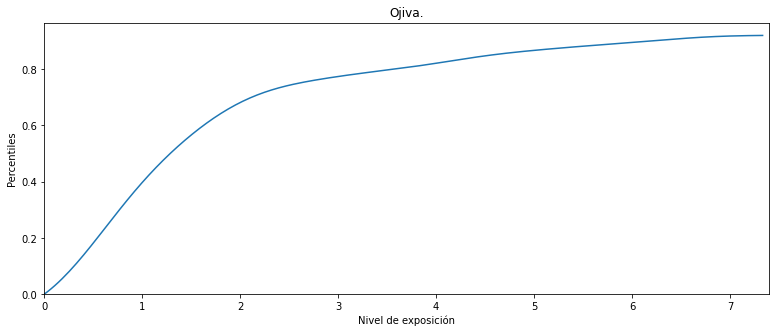

In [16]:
plt.figure(figsize = (13,5))
sns.kdeplot(data = df , 
            x = "nivel_exposicion_campos", 
            cumulative = True, 
            cut = 0)
plt.xlabel("Nivel de exposición",)
plt.ylabel("Percentiles")
plt.title("Ojiva.",)
plt.xlim([0,7.4])
plt.show()